### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [591]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [592]:
data = pd.read_csv('data/coupons.csv')

In [593]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [594]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [595]:
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [596]:
data['Bar'].fillna('never', inplace=True)
data['RestaurantLessThan20'].fillna('never', inplace=True)
data['CarryAway'].fillna('never', inplace=True)
data['Restaurant20To50'].fillna('never', inplace=True)
data['CoffeeHouse'].fillna('never', inplace=True)
data['car'].fillna('Unknown', inplace=True)

In [597]:
data['Bar'] = data['Bar'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['CarryAway'] = data['CarryAway'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['car'] = data['car'].str.replace('Car that is too old to install Onstar :D','unsupported car')
data['apptype']= np.where(((data['car'] == 'Unknown') | (data['car'] == 'unsupported car') | (data['car'] == 'Scooter and motorcycle')), 'mobile', np.where(data['car'] == 'do not drive', 'not driving', 'car'))
data['destinationNum']= np.where(data['destination'] == 'Home',0,np.where(data['destination'] == 'Work',1,2))
data['age'] = data['age'].str.replace('below21','Under 25').str.replace('21','Under 25').str.replace('26','Under 30').str.replace('31','Under 40').str.replace('36','Under 40').str.replace('41','Under 50').str.replace('46','Under 50')
data['BarVists']= np.where(data['Bar'] == '0',0,np.where(data['Bar'] == '1',1,np.where(data['Bar'] == '2',2,np.where(data['Bar'] == '6',6,8)))) 
data['CheapRestaurantVists']= np.where(data['RestaurantLessThan20'] == '0',0,np.where(data['RestaurantLessThan20'] == '1',1,np.where(data['RestaurantLessThan20'] == '2',2,np.where(data['RestaurantLessThan20'] == '6',6,8)))) 
data['CarryVisits']= np.where(data['CarryAway'] == '0',0,np.where(data['CarryAway'] == '1',1,np.where(data['CarryAway'] == '2',2,np.where(data['CarryAway'] == '6',6,8)))) 
data['incomeLimits']= np.where(data['income'] == '$37500 - $49999','$50K',
                            np.where(data['income'] == 'Less than $12500','$12.5K',
                            np.where(data['income'] == '$12500 - $24999','$25K',
                            np.where(data['income'] == '$25000 - $37499','$37.5K',
                            np.where(data['income'] == '$50000 - $62499','$62.5K',
                            np.where(data['income'] == '$62500 - $74999','$75K',
                            np.where(data['income'] == '$75000 - $87499','$87.5K',
                            np.where(data['income'] == '$87500 - $99999','$100K',
                            '>100K'))))))))

#array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
#       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
#       '$100000 or More', '$87500 - $99999', 'Less than $12500']

#print('bar---', data['Bar'].unique())
#print('age---', data['age'].unique())
#print('age---', data['age'].value_counts())
#print('bar---', data['BarVists'].unique())
#print('Restaurant less than 20--- ',data['RestaurantLessThan20'].unique())
#print('Restaurant less than 20--- ',data['CheapRestaurantVists'].unique())
#print('Restaurant less than 20--- ', data['CheapRestaurantVists'].value_counts())
#print('Carry Away---', data['CarryAway'].unique())
#print('Restaurant 20 to 50--- ',data['Restaurant20To50'].unique())
#print('CoffeeHouse--- ',data['CoffeeHouse'].unique())
#print('car--- ',data['car'].unique())
#['Unknown' 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive' 'unsupported car']
#print('destination--- ',data['destinationNum'].unique())
#print('appType--- ',data['apptype'].unique())
#print('Coupon--- ',data['Y'].unique())
#data['Bar'].value_counts()
#data['RestaurantLessThan20'].value_counts()
#data['CarryAway'].value_counts()
#data['Restaurant20To50'].value_counts()
#data['CoffeeHouse'].value_counts()



4. What proportion of the total observations chose to accept the coupon? 



In [598]:
data['Y'].value_counts().get(0,0)/len(data)
value_counts = data['Y'].value_counts()
print('Values of Y:',value_counts)
accepted_coupon = (data['Y'] == 1).sum()
print('Proportion of observations accepting the coupon:',round(accepted_coupon/len(data),2))

Values of Y: Y
1    7210
0    5474
Name: count, dtype: int64
Proportion of observations accepting the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

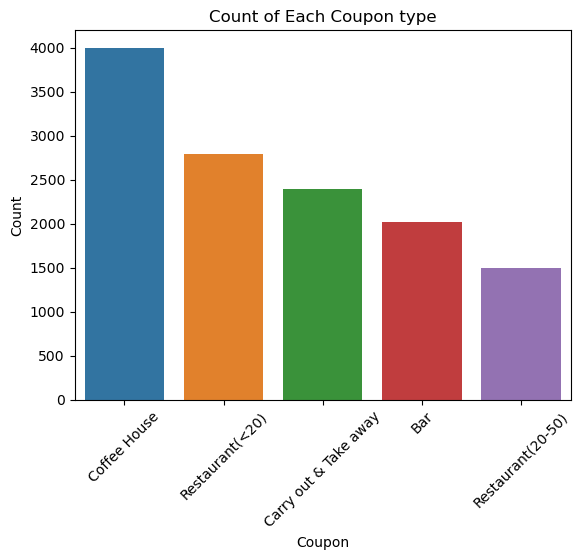

In [599]:
value_counts = data['coupon'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and title
plt.xlabel('Coupon')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Count of Each Coupon type')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [600]:
px.histogram(data,x='temperature',nbins=6)

In [601]:
fig = px.histogram(data, x="coupon", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Coupon Types and their acceptance')

fig

In [602]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

fig = px.histogram(df_bar, x="income", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Income class')

fig

In [603]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

fig = px.histogram(df_bar, x="maritalStatus", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Marital status class')

fig

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [604]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

2. What proportion of bar coupons were accepted?


In [605]:
df_bar['Y'].value_counts().get(0,0)/len(df_bar)
value_counts = df_bar['Y'].value_counts()
print('Values of Y:\n',value_counts)
accepted_coupon = (df_bar['Y'] == 1).sum()
print('Proportion of observations accepting the coupon:',round(accepted_coupon/len(df_bar),2))

Values of Y:
 Y
0    1190
1     827
Name: count, dtype: int64
Proportion of observations accepting the coupon: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [606]:
df_bar_3orfewer = df_bar.loc[(df_bar['BarVists']<=2)]
print('Bar visits 3 or fewer who took coupon:',(df_bar_3orfewer['Y'] == 1).sum())
print('Bar visits 3 or fewer:',len(df_bar_3orfewer))
print('Acceptance Rate Bar 3 or fewer:',round((df_bar_3orfewer['Y'] == 1).sum()/len(df_bar_3orfewer),2))

df_bar_3greater = df_bar.loc[(df_bar['BarVists'] >= 4)]
print()
print('Bar visits greater than 3 who took coupon:',(df_bar_3greater['Y'] == 1).sum())
print('Bar visits greater than 3:',len(df_bar_3greater))
print('Acceptance Rate Bar 3 or greater:',round((df_bar_3greater['Y'] == 1).sum()/len(df_bar_3greater),2))

Bar visits 3 or fewer who took coupon: 674
Bar visits 3 or fewer: 1818
Acceptance Rate Bar 3 or fewer: 0.37

Bar visits greater than 3 who took coupon: 153
Bar visits greater than 3: 199
Acceptance Rate Bar 3 or greater: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [607]:
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive')]
t = df_driver.loc[(df_driver['age'] != 'Under 25')]
t = t.loc[(t['BarVists'] > 1)]

acceptance = round((t['Y'] == 1).sum()/len(t),2)
print('Drivers who go to a bar more than once a month and are over the age of 25:')
print('Who took coupon:',(t['Y'] == 1).sum())
print('All:',len(t))
print('Acceptance Rate: ',acceptance)

# All others
print()
print('All Others:')
acceptance2 = round(((data['Y'] == 1).sum()-(t['Y'] == 1).sum())/(len(data)-len(t)),2)
print('Who took coupon:',((data['Y'] == 1).sum()-(t['Y'] == 1).sum()))
print('All:',(len(data)-len(t)))
print('Acceptance Rate - NOT of over 25, Driver, More than 1 bar attendance: ',acceptance2)



Drivers who go to a bar more than once a month and are over the age of 25:
Who took coupon: 290
All: 418
Acceptance Rate:  0.69

All Others:
Who took coupon: 6920
All: 12266
Acceptance Rate - NOT of over 25, Driver, More than 1 bar attendance:  0.56


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [608]:
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive')]
df_gt1Barvisits = df_driver.loc[(df_driver['BarVists'] > 1)]
acc_df_gt1Barvisits = round((df_gt1Barvisits['Y'] == 1).sum()/len(df_gt1Barvisits),2)
print('Drivers with >1 bar visits:',acc_df_gt1Barvisits)

df_job_passenger = df_driver.loc[(df_driver['occupation'] != 'Farming Fishing & Forestry') & (df_driver['passanger'] != 'Kid/(s/)') & (df_driver['passanger'] != 'Alone')]
acc_df_job_passenger = round((df_job_passenger['Y'] == 1).sum()/len(df_job_passenger),2)
print('Drivers with Non Fishing job and Non-kid passengers:',acc_df_job_passenger)


Drivers with >1 bar visits: 0.69
Drivers with Non Fishing job and Non-kid passengers: 0.41


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [609]:
#driver
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive') | (df_bar['car'] != 'Unknown')]

#driver with more than 1 bar visit
df_gt1Barvisits = df_driver.loc[(df_driver['BarVists'] > 1)]

#driver with more than 1 bar visit, who had passenger who was not kid
df_nonkid_passenger = df_gt1Barvisits.loc[((df_gt1Barvisits['passanger'] != 'Kid/(s/)') & (df_gt1Barvisits['passanger'] != 'Alone'))]

#driver with more than 1 bar visit, who had passenger who was not kid and NOT WIDOWED
df_condition1 = df_nonkid_passenger.loc[(df_nonkid_passenger['maritalStatus'] != 'Widowed')]
print('')
print('Drivers who')
print('* go to bars more than once a month, had passengers that were not a kid, and were not widowed')
print('Acceptance Rate',round((df_condition1['Y'] == 1).sum()/len(df_condition1),2))

# driver with more than 1 bar visit, who is under the age of 30
df_condition2 = df_gt1Barvisits.loc[(df_gt1Barvisits['age'] == 'Under 25') | (df_gt1Barvisits['age'] == 'Under 30')]
print('')
print('Drivers who')
print('* go to bars more than once a month and are under the age of 30')
print('Acceptance Rate',round((df_condition2['Y'] == 1).sum()/len(df_condition2),2))

      
#go to cheap restaurants more than 4 times a month and income is less than 50K.
df_condition3 = df_driver.loc[(df_driver['CheapRestaurantVists']>4) & ((df_driver['income'] == '$25000 - $37499') | (df_driver['income'] == '$37500 - $49999'))]
print('')
print('Drivers who')
print('* go to cheap restaurants more than 4 times a month and income is less than 50K')
print('Acceptance Rate',round((df_condition3['Y'] == 1).sum()/len(df_condition3),2))

df_final = data.loc[data.isin(df_condition1).all(axis=1) | data.isin(df_condition2).all(axis=1) | data.isin(df_condition2).all(axis=1)]
acceptance2 = round((df_final['Y'] == 1).sum()/len(df_final),2)
print('')
print('Drivers who meet any of these three conditions:')
print('* go to bars more than once a month, had passengers that were not a kid, and were not widowed OR')
print('* go to bars more than once a month and are under the age of 30 OR')
print('* go to cheap restaurants more than 4 times a month and income is less than 50K.')
print('Acceptance Rate - ',acceptance2)



Drivers who
* go to bars more than once a month, had passengers that were not a kid, and were not widowed
Acceptance Rate 0.65

Drivers who
* go to bars more than once a month and are under the age of 30
Acceptance Rate 0.72

Drivers who
* go to cheap restaurants more than 4 times a month and income is less than 50K
Acceptance Rate 0.47

Drivers who meet any of these three conditions:
* go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
* go to bars more than once a month and are under the age of 30 OR
* go to cheap restaurants more than 4 times a month and income is less than 50K.
Acceptance Rate -  0.67


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Coupons are accepted most among drivers who are -
- Under 30 years of age
- Go to bars more than 1 time per month.
- Are not widowed. Looks single or unmarried with partners do accept coupons more. 
- Aware to skip bars when kids are passengers in the car
- From lower income group that frequent cheaper restaurants



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [630]:
fig = px.histogram(data, x="coupon", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400)
fig.update_layout(title='Influence of Income')

fig

In [610]:
df_carry = data.loc[(data['coupon'] == 'Carry out & Take away')]
df_carry_coupon = df_carry.loc[(df_carry['Y'] == 1)]

In [611]:
print('Overall Acceptance Rate:',round((df_carry['Y'] == 1).sum()/len(df_carry),2))

Overall Acceptance Rate: 0.74


In [612]:
df_carry = df_carry.sort_values(by='incomeLimits')
fig = px.histogram(df_carry, x="incomeLimits", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400)
fig.update_layout(title='Influence of Income')

fig

In [619]:
df_carry_poor = df_carry.loc[(df_carry['incomeLimits'] == '$12.5K') | (df_carry['incomeLimits'] == '$37.5K') | (df_carry['incomeLimits'] == '$50K')]

fig = px.histogram(df_carry_poor, x="maritalStatus", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400)
fig.update_layout(title='Influence of Marital Status')

fig

In [620]:
df_carry_poor = df_carry.loc[(df_carry['incomeLimits'] == '$12.5K') | (df_carry['incomeLimits'] == '$37.5K') | (df_carry['incomeLimits'] == '$50K')]

fig = px.histogram(df_carry_poor, x="maritalStatus", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400)
fig.update_layout(title='Influence of Marital Status')

fig

In [626]:
df_carry_poor_widowed = df_carry_poor.loc[(df_carry_poor['maritalStatus'] == 'Widowed')]

fig = px.histogram(df_carry_poor_widowed, x="has_children", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Children')

fig

In [629]:
df_carry_poor_widowed = df_carry_poor.loc[(df_carry_poor['maritalStatus'] == 'Widowed')]

fig = px.histogram(df_carry_poor_widowed, x="destination", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Children')

fig

### Coupons most utilized for Carry out & Takeaway -
- Overall Acceptance Rate: 0.74
- Most people who use this category of coupons do it 3+ times.
- Widowed, 50+ year olds 
- Chances of takeouts are higher when they have children 
- They are from the lower income group 
- They use mostly these coupons when their destination is home